In [9]:
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import mode
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv("Ethereum_4_7_2018-6_6_2018_historical_data_coinmarketcap.csv")
data.head()

timeOpen                 timeClose  \
0  2024-08-29T00:00:00.000Z  2024-08-29T23:59:59.999Z   
1  2024-08-28T00:00:00.000Z  2024-08-28T23:59:59.999Z   
2  2024-08-27T00:00:00.000Z  2024-08-27T23:59:59.999Z   
3  2024-08-26T00:00:00.000Z  2024-08-26T23:59:59.999Z   
4  2024-08-25T00:00:00.000Z  2024-08-25T23:59:59.999Z   

                   timeHigh                   timeLow  name         open  \
0  2024-08-29T15:35:00.000Z  2024-08-29T22:10:00.000Z  2781  2528.362339   
1  2024-08-28T21:27:00.000Z  2024-08-28T01:38:00.000Z  2781  2458.904729   
2  2024-08-27T05:52:00.000Z  2024-08-27T22:16:00.000Z  2781  2681.622855   
3  2024-08-26T00:36:00.000Z  2024-08-26T21:23:00.000Z  2781  2749.247573   
4  2024-08-25T21:23:00.000Z  2024-08-25T07:39:00.000Z  2781  2769.098245   

          high          low        close       volume     marketCap  \
0  2595.976950  2507.502461  2528.792715  13946434277  3.042030e+11   
1  2553.820133  2422.293631  2528.415504  20359545410  3.041590e+11   
2  2700.152794  2401.175001  2458.726473  18028996056  2.958040e+11   
3  2763.004177  2668.886669  2681.340514  12282035835  3.225970e+11   
4  2793.012985  2736.088941  2749.157667   9375535539  3.307190e+11   

                  timestamp  
0  2024-08-29T23:59:59.999Z  
1  2024-08-28T23:59:59.999Z  
2  2024-08-27T23:59:59.999Z  
3  2024-08-26T23:59:59.999Z  
4  2024-08-25T23:59:59.999Z

In [11]:
data.shape

(2336, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   2336 non-null   object 
 1   timeClose  2336 non-null   object 
 2   timeHigh   2336 non-null   object 
 3   timeLow    2336 non-null   object 
 4   name       2336 non-null   int64  
 5   open       2336 non-null   float64
 6   high       2336 non-null   float64
 7   low        2336 non-null   float64
 8   close      2336 non-null   float64
 9   volume     2336 non-null   int64  
 10  marketCap  2336 non-null   float64
 11  timestamp  2336 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 219.1+ KB


In [13]:
data["timeopen"] = pd.to_datetime(data["timeOpen"])
print(data["timeopen"])
print("Initial date:",data["timeopen"].min())
print("End date:",data["timeopen"].max())

0      2024-08-29 00:00:00+00:00
1      2024-08-28 00:00:00+00:00
2      2024-08-27 00:00:00+00:00
3      2024-08-26 00:00:00+00:00
4      2024-08-25 00:00:00+00:00
                  ...           
2331   2018-04-12 00:00:00+00:00
2332   2018-04-11 00:00:00+00:00
2333   2018-04-10 00:00:00+00:00
2334   2018-04-09 00:00:00+00:00
2335   2018-04-08 00:00:00+00:00
Name: timeopen, Length: 2336, dtype: datetime64[ns, UTC]
Initial date: 2018-04-08 00:00:00+00:00
End date: 2024-08-29 00:00:00+00:00


In [14]:
data["name"] = data["name"].astype(str)

In [15]:
data.describe()

open         high          low        close        volume  \
count  2336.000000  2336.000000  2336.000000  2336.000000  2.336000e+03   
mean   1463.420970  1502.762165  1420.148014  1464.122492  1.303476e+10   
std    1230.191451  1263.425107  1192.417982  1229.872068  9.995172e+09   
min      84.279694    85.342743    82.829890    84.308296  9.484880e+08   
25%     237.721675   243.720758   231.337888   237.763124  6.127227e+09   
50%    1389.196389  1455.205366  1334.236817  1403.829157  1.080299e+10   
75%    2299.610834  2355.889448  2214.482448  2299.563531  1.755068e+10   
max    4810.071533  4891.704698  4718.039256  4812.087614  8.448291e+10   

          marketCap  
count  2.336000e+03  
mean   1.733567e+11  
std    1.477368e+11  
min    8.751210e+09  
25%    2.611588e+10  
50%    1.673735e+11  
75%    2.732298e+11  
max    5.690940e+11

In [16]:
data['timeopen'] = pd.to_datetime(data['timeopen']).dt.date
print(data["timeopen"].head())
data['timeclose'] = pd.to_datetime(data['timeClose']).dt.date
print(data["timeclose"].head())
data['timehigh'] = pd.to_datetime(data['timeHigh']).dt.date
print(data["timehigh"].head())
data['timelow'] = pd.to_datetime(data['timeLow']).dt.date
print(data["timelow"].head())

0    2024-08-29
1    2024-08-28
2    2024-08-27
3    2024-08-26
4    2024-08-25
Name: timeopen, dtype: object
0    2024-08-29
1    2024-08-28
2    2024-08-27
3    2024-08-26
4    2024-08-25
Name: timeclose, dtype: object
0    2024-08-29
1    2024-08-28
2    2024-08-27
3    2024-08-26
4    2024-08-25
Name: timehigh, dtype: object
0    2024-08-29
1    2024-08-28
2    2024-08-27
3    2024-08-26
4    2024-08-25
Name: timelow, dtype: object


In [17]:
data["timelow"] = data["timelow"].astype(str)
data["date of year"] = data["timelow"].str.split("-").str[0]
print(data["date of year"].unique())
data["timelow"] = data["timelow"].astype(str)
data["date of month"] = data["timelow"].str.split("-").str[1]
print(data["date of month"].unique())

['2024' '2023' '2022' '2021' '2020' '2019' '2018']
['08' '07' '06' '05' '04' '03' '02' '01' '12' '11' '10' '09']


In [18]:
data['date'] = pd.to_datetime(data['date of year'].astype(str) + '-' + data['date of month'].astype(str))
data['date'].head()

0   2024-08-01
1   2024-08-01
2   2024-08-01
3   2024-08-01
4   2024-08-01
Name: date, dtype: datetime64[ns]

In [19]:
data = data.sort_values(by='timeopen', ascending=True)

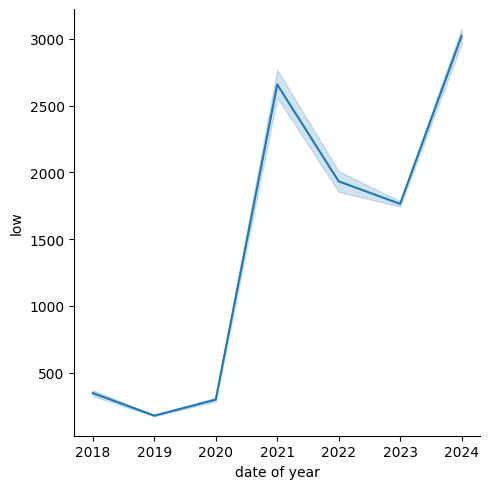

In [20]:
sns.relplot(data=data[["low","date of year"]], x = "date of year",y = "low",kind = "line")
plt.show()

In [21]:
data = data.sort_values(by='date of month')
fig = go.Figure(data=[go.Candlestick(x=data['date'],
                open=data['open'], high=data['high'],
                low=data['low'], close=data['close'])
                      ])
fig.show()

In [22]:
data['timeopen'] = pd.to_datetime(data['timeopen']).apply(lambda x: x.timestamp())
data['timeclose'] = pd.to_datetime(data['timeclose']).apply(lambda x: x.timestamp())
data['timehigh'] = pd.to_datetime(data['timehigh']).apply(lambda x: x.timestamp())
data['timelow'] = pd.to_datetime(data['timelow']).apply(lambda x: x.timestamp())

In [23]:
data.rename(columns={'timeopen': 'Date'}, inplace=True)

In [24]:
data['Date'] = pd.to_datetime(data['Date'], unit='s')
data = data.sort_values(by='Date')

In [25]:
data_face = data[['Date','close']]
print("Shape of close dataframe:", data_face.shape)

Shape of close dataframe: (2336, 2)


In [26]:
fig = px.line(data_face, x=data_face.Date, y=data_face.close,labels={'date':'Date','close':'price'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of ethereum close price 2018-2024', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])

In [28]:
def create_sequences(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -2])
    return np.array(X), np.array(y)

In [29]:
time_step = 3
X, y = create_sequences(scaled_data, time_step)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting the close price

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0566 - val_loss: 9.8985e-04
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 7.5140e-04
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - val_loss: 6.1853e-04
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 7.0694e-04
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - val_loss: 5.6374e-04
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 5.6959e-04
Epoch 9/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 6.3651e-04
Epoch 10/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - val_loss: 7.7812e-04
Epoch 11/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 5.9726e-04
Epoch 12/200
55/55 ━━━━━━

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
predicted_prices = model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_prices)
mse = mean_squared_error(y_test, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_prices)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


In [ ]:
predicted_prices_reshaped = predicted_prices.reshape(-1, 1)
X_last = X_test[:, -1, :-1]
predicted_prices_full = np.concatenate((X_last, predicted_prices_reshaped), axis=1)

In [ ]:
last_known_values = scaled_data[-1, :-1]
dummy_other_features = np.tile(last_known_values, (predicted_prices.shape[0], 1))
predicted_prices_full = np.concatenate((dummy_other_features, predicted_prices), axis=1)
predicted_prices_rescaled = scaler.inverse_transform(predicted_prices_full)[:, -1]

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(predicted_prices_rescaled, color='red', label='Predicted Close Price for Next Year')
plt.title('Ethereum Price Prediction for the Next Year')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data.head()